In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random


In [35]:
def show_img(array: np.ndarray):
    plt.imshow(array)
    plt.show()

width=1082 height=670


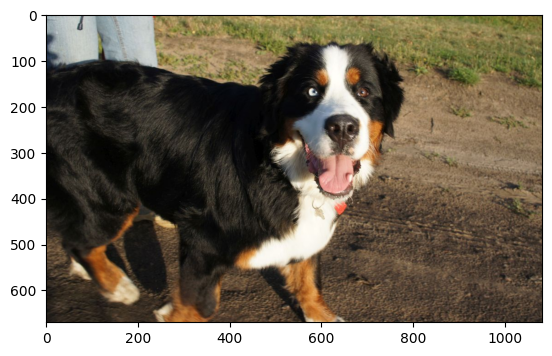

In [36]:
cv_img = cv.imread('pies.jpeg')
cv_img = cv.cvtColor(cv_img, cv.COLOR_BGR2RGB)

height, width, *_ = cv_img.shape
print(f'{width=} {height=}')
# w - h / 2

plt.imshow(cv_img)
plt.show()

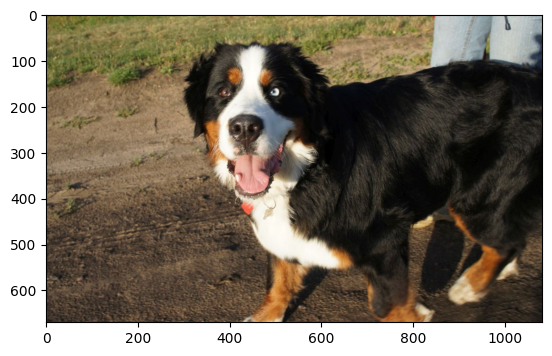

In [37]:
# odbicie lustrzane w pionie
def odbicie_lustrzane_pion(array: np.ndarray) -> np.ndarray:
    return array[:, ::-1]

img = odbicie_lustrzane_pion(cv_img)

plt.imshow(img)
plt.show()

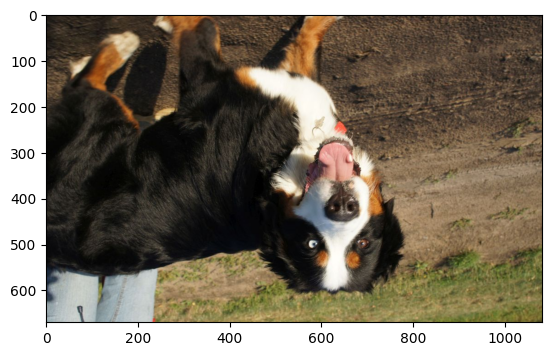

In [38]:
# odbicie lustrzane w poziomie

def odbicie_lustrzane_poziom(array: np.ndarray) -> np.ndarray:
    return array[::-1, :]

img = odbicie_lustrzane_poziom(cv_img)

plt.imshow(img)
plt.show()

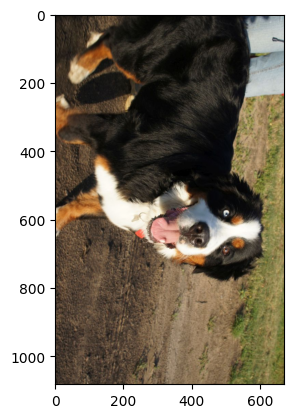

In [39]:
# 90 stopni w prawo

def rotate_clockwise_90(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape
    result = np.zeros((width, height, channels), dtype=int)
    height, width = width, height
    for row in range(width):
        for column in range(height):
            result[column, row] = np.copy(array[-row, column])

    return result

# height, width, channels = cv_img.shape
# print(f'original {width=} {height=}')

# img = np.zeros((width, height, channels), dtype=int)
# height, width, channels = img.shape
# print(f'rotated {width=} {height=}')

# for row in range(width):
#     for column in range(height):
#         img[column, row] = np.copy(cv_img[-row, column])

img = rotate_clockwise_90(cv_img)
plt.imshow(img)
plt.show()

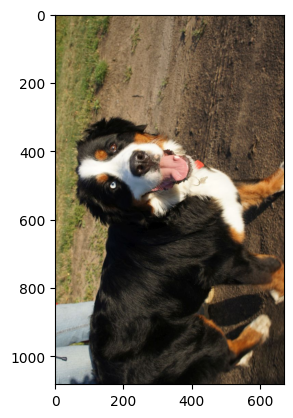

In [40]:
# 90 stopni w lewo

def rotate_anticlockwise_90(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape
    result = np.zeros((width, height, channels), dtype=int)
    height, width = width, height
    for row in range(width):
        for column in range(height):
            result[column, row] = np.copy(array[row, -column])

    return result

img = rotate_anticlockwise_90(cv_img)

plt.imshow(img)
plt.show()

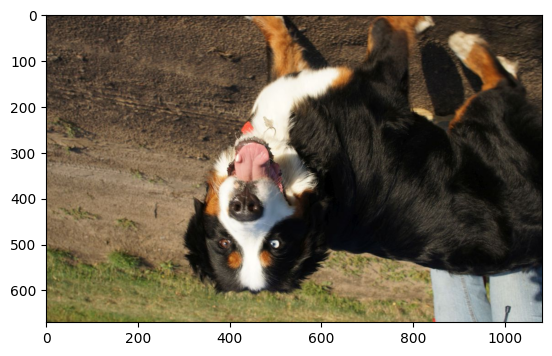

In [41]:
# 180 stopni
def rotate_clockwise_180(array: np.ndarray) -> np.ndarray:
    array = array[::-1, :]
    return array[:, ::-1]

img = rotate_clockwise_180(cv_img)

plt.imshow(img)
plt.show()


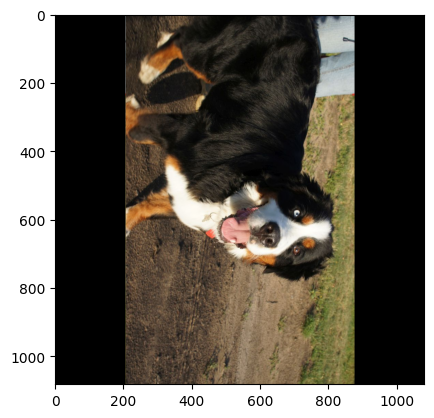

In [42]:

def expand_to_square(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape

    if height > width:
        result = np.zeros(shape=(height, height, channels), dtype=int)
        offset = (height - width) // 2
        for row in range(width):
            for column in range(height):
                result[column, row + offset] = np.copy(array[column, row])
        return result
    else:
        return array

img = rotate_clockwise_90(cv_img)
img = expand_to_square(img)

plt.imshow(img)
plt.show()


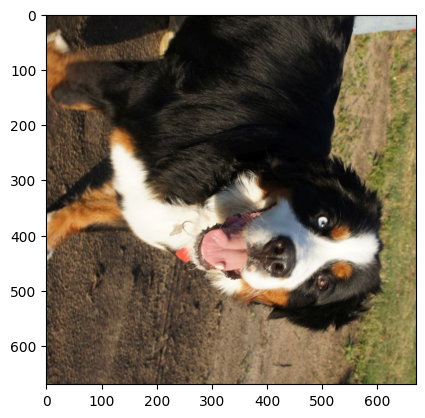

In [43]:
def cut_square(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape

    if height > width:
        result = np.zeros(shape=(width, width, channels), dtype=int)
        offset = (height - width) // 2
        for row in range(width):
            for column in range(width):
                result[column, row] = np.copy(array[column + offset, row])
        return result
    else:
        return array

img = rotate_clockwise_90(cv_img)
img = cut_square(img)

plt.imshow(img)
plt.show()

(512, 512, 3)


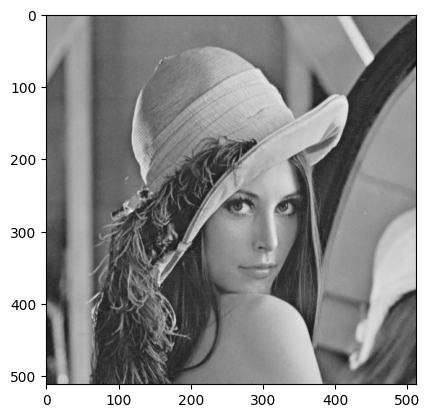

In [44]:
cv_lenna = cv.imread('Lenna.png')
cv_lenna = cv.cvtColor(cv_lenna, cv.COLOR_BGR2GRAY)
cv_lenna = cv.cvtColor(cv_lenna, cv.COLOR_BGR2RGB)
print(cv_lenna.shape)

plt.imshow(cv_lenna)
plt.show()

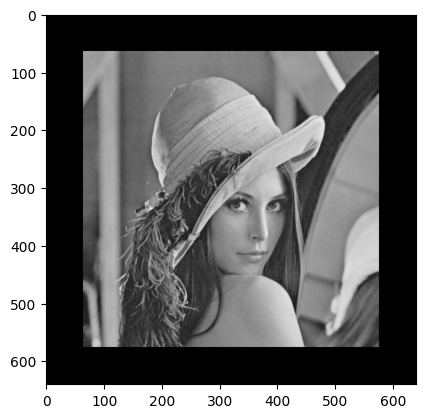

In [45]:
result_img = np.zeros(shape=(640, 640, 3), dtype=int)
second_img = cv_lenna

if result_img.shape >= second_img.shape:
    height, width, channels = second_img.shape
    height_offset = (result_img.shape[0] - second_img.shape[0]) // 2
    width_offset = (result_img.shape[1] - second_img.shape[1]) // 2

    for row in range(width):
        for column in range(height):
            result_img[column + height_offset, row + width_offset] = np.copy(second_img[column, row])
else:
    print('First must be bigger than second to fit')

show_img(result_img)

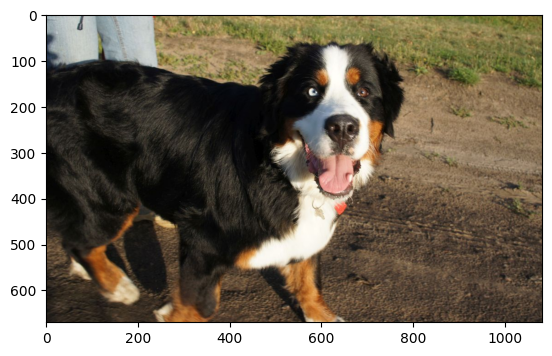

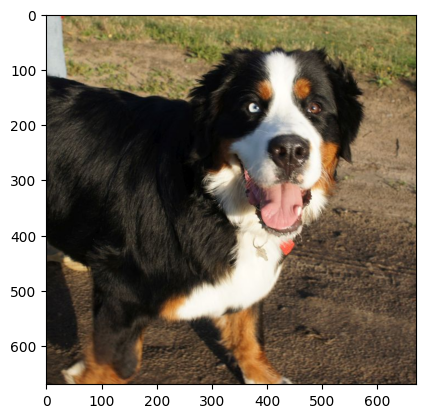

In [46]:
def kadrowanie(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape
    result_size = min(height, width)

    result = np.zeros(shape=(result_size, result_size, 3), dtype=int)
    offset = abs((height - width) // 2)

    for row in range(result_size):
        for column in range(result_size):
            result[column, row] = np.copy(array[column, row + offset])

    return result

    # height, width, channels = cv_img.shape
    # result_size = min(height, width)

    # result = np.zeros(shape=(result_size, result_size, 3), dtype=int)
    # offset = abs((height - width) // 2)

    # for row in range(result_size):
    #     for column in range(result_size):
    #         result[column, row] = np.copy(cv_img[column, row + offset])

show_img(cv_img)
show_img(kadrowanie(cv_img))

puzzle_img.shape=(670, 1082, 3)


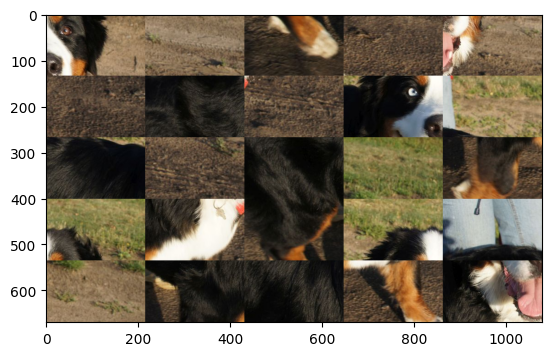

In [47]:
puzzle_img = cv_img
print(f'{puzzle_img.shape=}')

def create_puzzles(array: np.ndarray, slices: int) -> list[np.ndarray]:
    height, width, channels = array.shape
    puzzle_height, puzzle_width = (height // slices), (width // slices)
    puzzle_pieces: list[np.ndarray] = []

    for number_width in range(slices):
        for number_height in range(slices):
            piece = np.zeros(shape=(puzzle_height, puzzle_width, 3), dtype=int)

            for row in range(puzzle_width):
                for column in range(puzzle_height):
                    piece[column, row] = np.copy(array[column + (number_height * puzzle_height), row + (number_width * puzzle_width)])

            puzzle_pieces.append(piece)

    return puzzle_pieces

def join_puzzles(puzzles: list[np.ndarray], slices: int, randomize: bool = True) -> np.ndarray:

    if len(puzzles) % slices != 0:
        raise ValueError('Incorrect amount of puzzles')

    height, width, channels = puzzles[0].shape
    result = np.zeros(shape=(height * slices, width * slices, channels), dtype=int)

    if randomize:
        random.shuffle(puzzles)

    number_height = 0
    number_width = 0

    for piece in puzzles:
        for row in range(width):
            for column in range(height):
                result[column + (number_height * height), row + (number_width * width)] = np.copy(piece[column, row])

        number_height += 1
        if number_height >= slices:
            number_height = 0
            number_width += 1

    return result

result = create_puzzles(puzzle_img, 5)
# for image in result:
#     show_img(image)

joint_image = join_puzzles(result, 5, randomize=True)
show_img(joint_image)

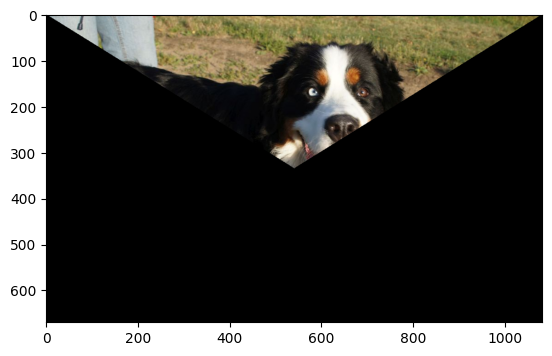

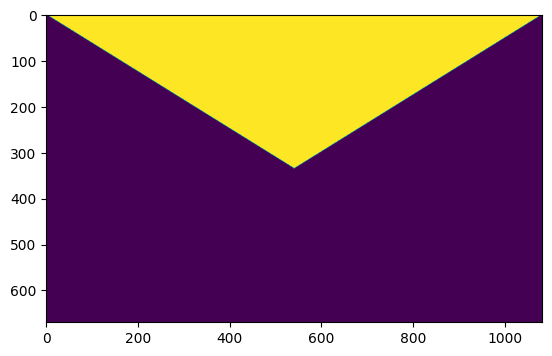

In [112]:
def mask_envelopes(array: np.ndarray) -> list[np.ndarray]:
    height, width, channels = array.shape

    left_right_func = lambda x: ((height - 0) / (0 - width) * x) + (height - ((height - 0) / (0 - width)) * 0)
    right_left_func = lambda x: ((0 - height) / (0 - width) * x) + (0 - ((0 - height) / (0 - width)) * 0)

    mask_array = []
    for m in range(4):
        mask_array.append(np.zeros(shape=(height, width), dtype=bool))

    for row in range(width):
        for column in range(height):
            if column >= left_right_func(row) and column <= right_left_func(row):
                mask_array[1][column, row] = True
            if column <= left_right_func(row) and column <= right_left_func(row):
                mask_array[0][column, row] = True
            if column <= left_right_func(row) and column >= right_left_func(row):
                mask_array[3][column, row] = True
            if column >= left_right_func(row) and column >= right_left_func(row):
                mask_array[2][column, row] = True

    image_overlayed = np.where(mask_array[0][...,None], array, 0)
    show_img(image_overlayed)
    return mask_array


def join_masked_envelopes(masks: list[np.ndarray]) -> np.ndarray:
    show_img(masks[0])

img = mask_envelopes(cv_img)
# for mask in img:
#     show_img(mask)

join_masked_envelopes(img)